In [6]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
import scipy.stats as stats
import seaborn as sns
from pandas.plotting import scatter_matrix


plt.rcParams['font.family'] = 'SimHei' #设置字体
plt.rcParams['axes.unicode_minus']=False #坐标轴的负号正常显示

In [15]:
df_h= pd.read_csv('C:\\Users\\86180\\Desktop\\美赛\\2023\\1.2困难模式比例每日波动.csv')
dif = df_h['dif']
dif

0     -0.002218
1     -0.004201
2     -0.002951
3     -0.000792
4     -0.002239
         ...   
301    0.000222
302    0.000432
303    0.000424
304   -0.002378
305   -0.002379
Name: dif, Length: 306, dtype: float64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
diff = scaler.fit_transform(np.array(dif).reshape(-1, 1))
diff

array([[0.13046198],
       [0.08564068],
       [0.11389054],
       [0.16268666],
       [0.12998117],
       [0.12454201],
       [0.09992621],
       [0.12960444],
       [0.12320045],
       [0.1367797 ],
       [0.28912107],
       [0.13841221],
       [0.15614182],
       [0.15752535],
       [0.11311445],
       [0.16260221],
       [0.17241711],
       [0.15096581],
       [0.19955237],
       [0.18853755],
       [0.14311188],
       [0.169739  ],
       [0.16103691],
       [0.16607075],
       [0.20066515],
       [0.31638772],
       [0.24878321],
       [0.25720251],
       [0.14540646],
       [0.1901798 ],
       [0.26661803],
       [0.23559016],
       [0.18723979],
       [0.26181632],
       [0.1915641 ],
       [0.22265998],
       [0.23889014],
       [0.23555711],
       [0.21621696],
       [0.19798002],
       [0.16785423],
       [0.22960771],
       [0.1542814 ],
       [0.16239511],
       [0.18525939],
       [0.19483683],
       [0.17374555],
       [0.180

In [3]:
df=pd.read_excel("特征归一化.xlsx")
df.head()

,Unnamed: 0,Word,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X),e,...,a,o,i,th,he,in,er,an,Frequency,Char_repitions
0,0,slump,1,3,23,39,24,9,1,0.0,...,0.0,0.0,0.0,0,0,0,0,0,0.000661,0.0
1,1,crank,1,5,23,31,24,14,2,0.0,...,0.5,0.0,0.0,0,0,0,0,1,0.000765,0.0
2,2,gorge,1,3,13,27,30,22,4,0.5,...,0.0,0.5,0.0,0,0,0,0,0,0.001304,0.5
3,3,query,1,4,16,30,30,17,2,0.5,...,0.0,0.0,0.0,0,0,0,1,0,0.005003,0.0
4,4,drink,1,9,35,34,16,5,1,0.0,...,0.0,0.0,0.5,0,0,1,0,0,0.027824,0.0


In [12]:
df['5m1']=(1/5)*(df['e']+df['t']+df['a']+df['o']+df['i'])
df['5m2']=(1/5)*(df['th']+df['he']+df['in']+df['er']+df['an'])
df1=df.iloc[53:,-4:]

,Frequency,Char_repitions,5m1,5m2
53,0.000243,0.5,0.2,0.0
54,0.003326,0.0,0.2,0.0
55,0.001247,0.0,0.1,0.0
56,0.026041,0.5,0.3,0.2
57,0.000803,0.0,0.2,0.2
...,...,...,...,...
354,0.000951,0.5,0.2,0.0
355,0.000121,0.0,0.2,0.0
356,0.001178,0.0,0.2,0.0
357,0.001504,0.0,0.2,0.0


In [22]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from patsy import dmatrices

In [23]:
score_linear = []
for i in range(100):
    X = df1
    y = diff

    Xtrain, Xtest, ytrain, ytest = train_test_split(
        X, y, random_state=i, test_size=0.2)

    model = LinearRegression()

    model.fit(Xtrain, ytrain)
    score_linear.append(model.score(Xtest, ytest))

np.mean(score_linear)

0.009956295901836016

In [24]:
df1['Hard']=diff
df1.head()

,Frequency,Char_repitions,5m1,5m2,Hard
53,0.000243,0.5,0.2,0.0,0.130462
54,0.003326,0.0,0.2,0.0,0.085641
55,0.001247,0.0,0.1,0.0,0.113891
56,0.026041,0.5,0.3,0.2,0.162687
57,0.000803,0.0,0.2,0.2,0.129981


In [25]:
correlations = df1.corr('spearman')
correlations.fillna(0,inplace=True)
correlations

,Frequency,Char_repitions,5m1,5m2,Hard
Frequency,1.000000,-0.094913,0.044265,0.039490,-0.294149
Char_repitions,-0.094913,1.000000,0.026541,-0.107501,0.239715
5m1,0.044265,0.026541,1.000000,0.093759,-0.055504
5m2,0.039490,-0.107501,0.093759,1.000000,-0.124267
Hard,-0.294149,0.239715,-0.055504,-0.124267,1.000000


In [26]:
def PvalueGetSpearman(X, Y):
    return stats.spearmanr(X, Y)[1].round(4)
(df1.corr(method=PvalueGetSpearman))
#(df1.corr(method=PvalueGetSpearman)>0.05)

,Frequency,Char_repitions,5m1,5m2,Hard
Frequency,1.0000,0.0975,0.4404,0.4913,0.0000
Char_repitions,0.0975,1.0000,0.6437,0.0603,0.0000
5m1,0.4404,0.6437,1.0000,0.1016,0.3332
5m2,0.4913,0.0603,0.1016,1.0000,0.0298
Hard,0.0000,0.0000,0.3332,0.0298,1.0000


In [27]:
(df1.corr(method=PvalueGetSpearman)>0.05)

,Frequency,Char_repitions,5m1,5m2,Hard
Frequency,True,True,True,True,False
Char_repitions,True,True,True,True,False
5m1,True,True,True,True,True
5m2,True,True,True,True,False
Hard,False,False,True,False,True


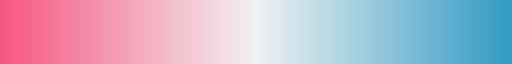

In [31]:
sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

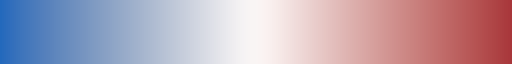

In [32]:
sns.color_palette('vlag', as_cmap=True)

In [33]:
# 绘制发散调色板用作cmap
# cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
cmap = sns.color_palette('vlag', as_cmap=True)
# cmap = sns.color_palette('coolwarm', as_cmap=True)

In [35]:
df1.columns = 

Index(['Frequency', 'Char_repitions', '5m1', '5m2', 'Hard'], dtype='object')

In [81]:
params = {
    "font.sans-serif":"Simhei",
    "axes.titlesize": 22,
    "legend.fontsize": 16,
    "figure.figsize": (10, 8),
    "figure.dpi":500,
    "axes.labelsize": 16,
    "axes.titlesize": 16,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "figure.titlesize": 22,
    "axes.unicode_minus": False
}
plt.rcParams.update(params)

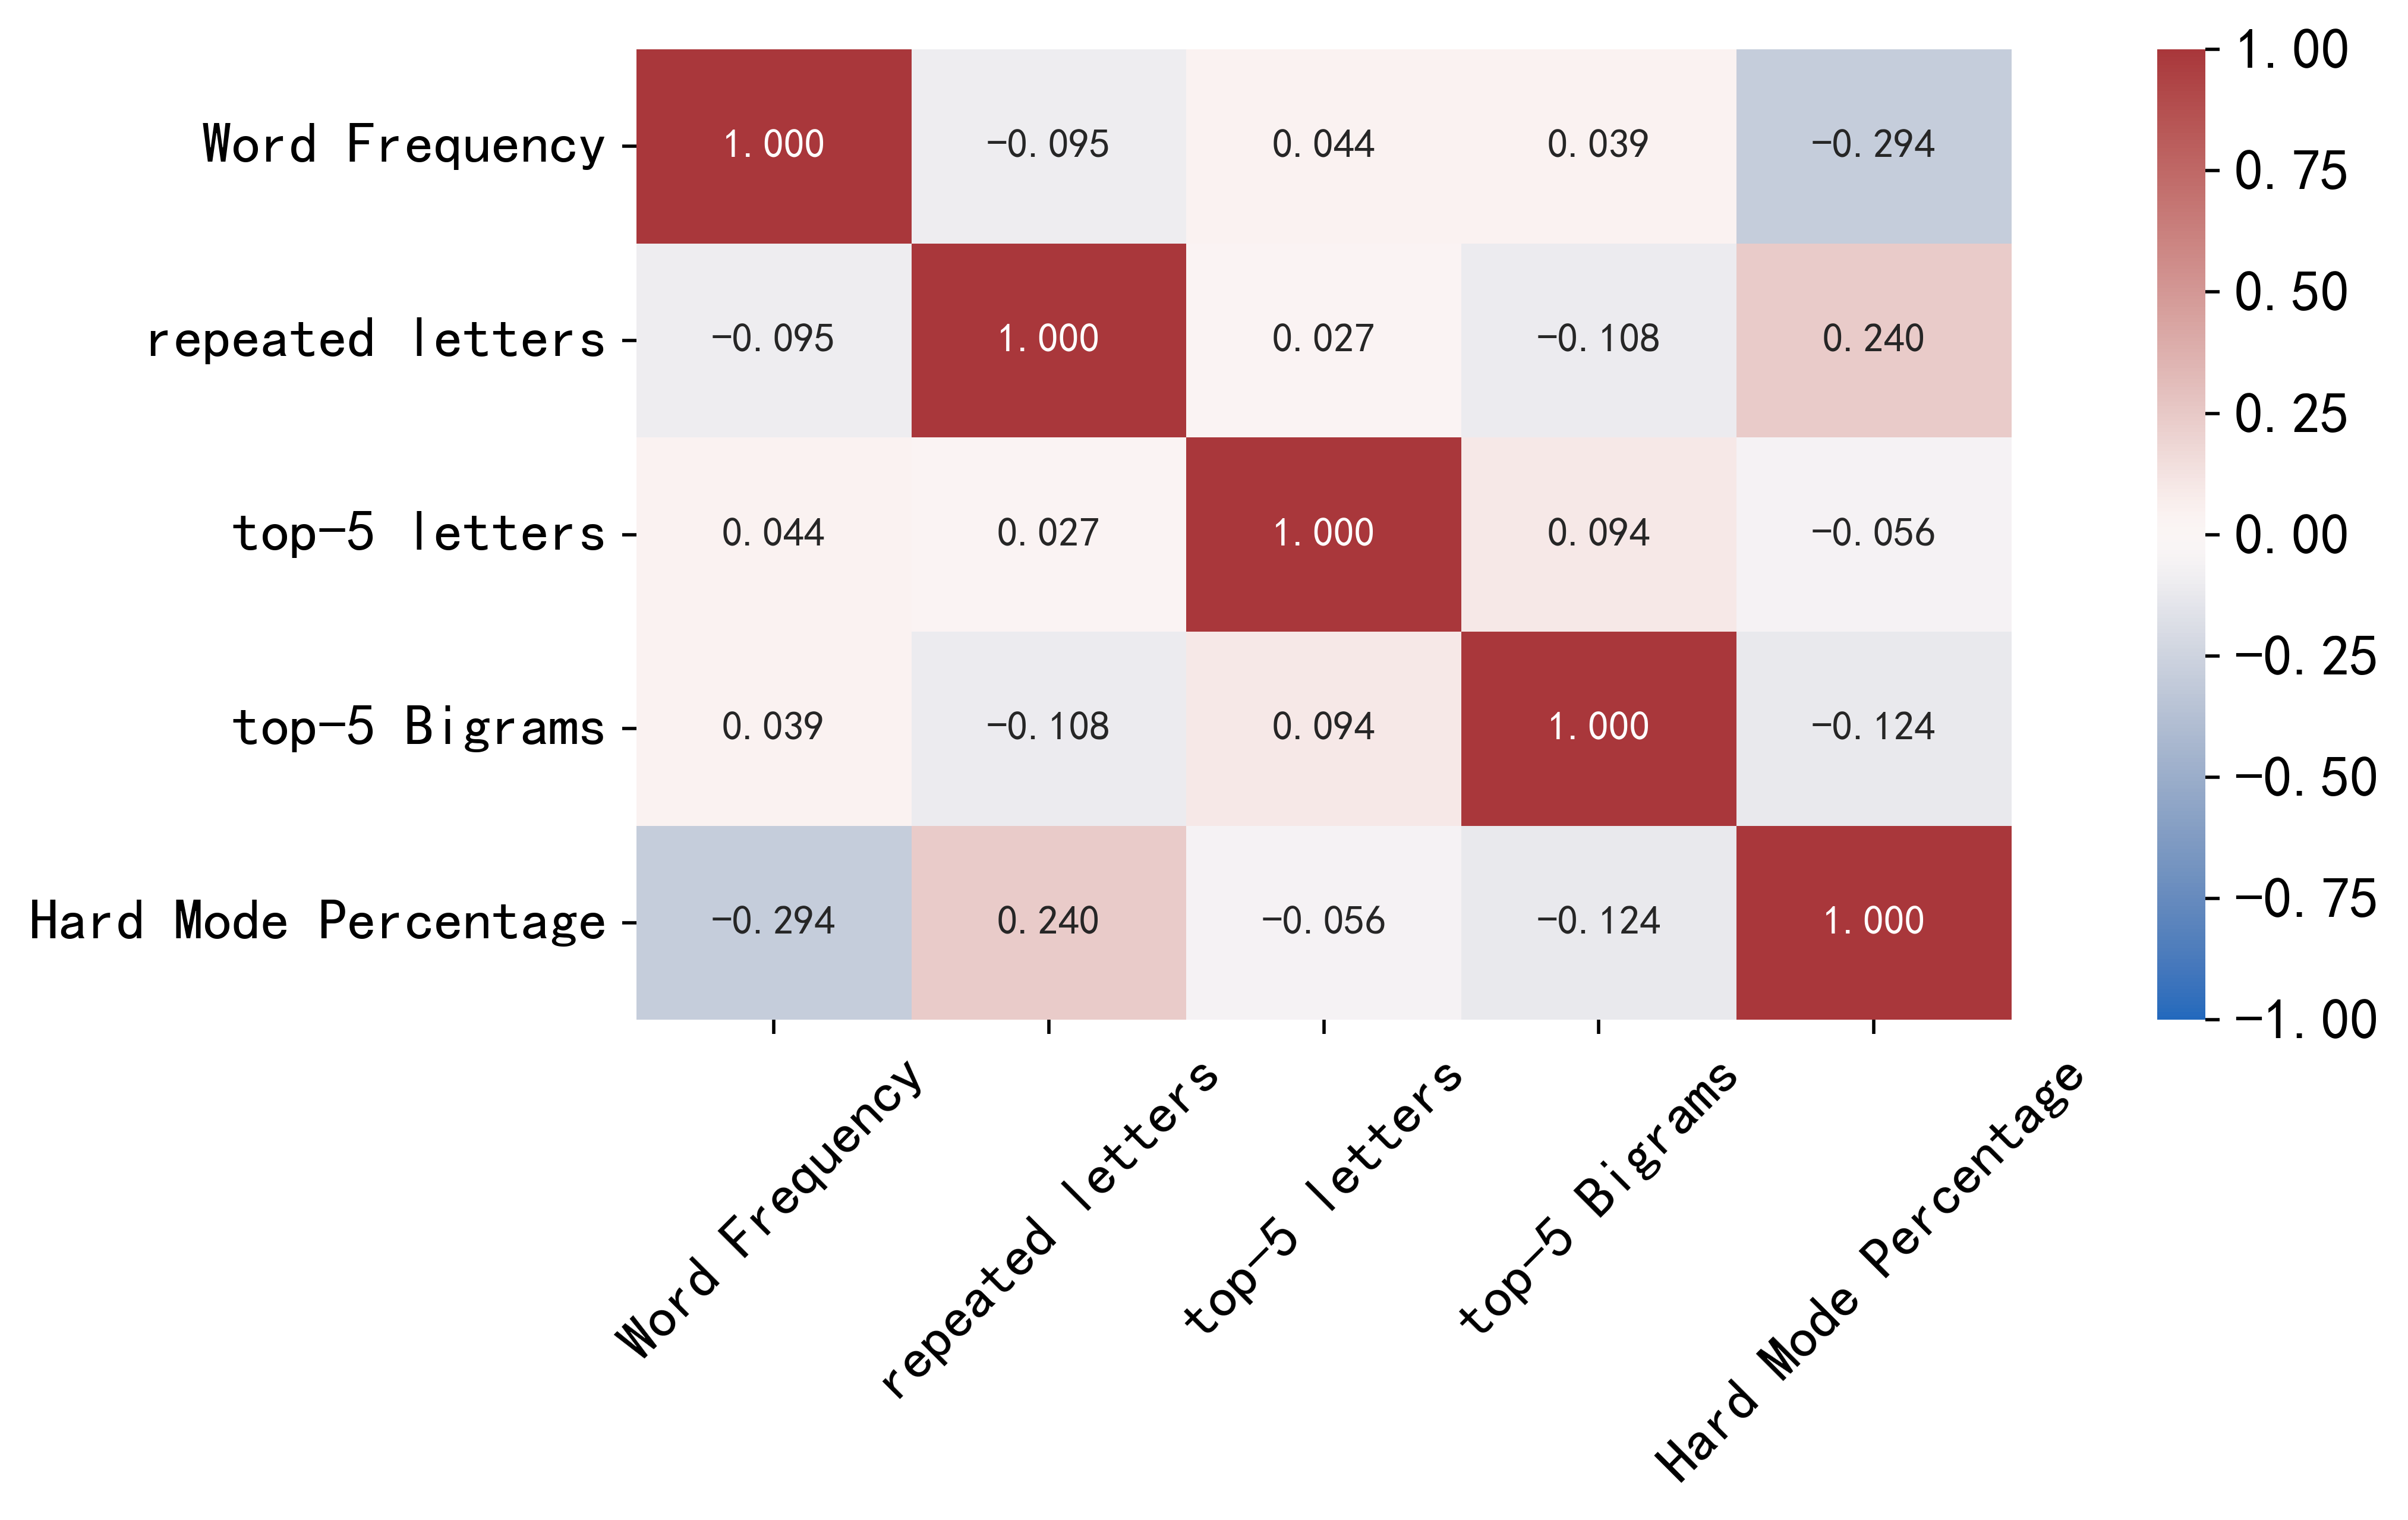

In [82]:
# 在heatmap(square=False)时可以调整图片大小，x、y轴标签的方向
plt.figure(figsize=(8,5))
ax = sns.heatmap(correlations, vmin=-1, vmax=1, cmap=cmap, annot=True, fmt='.3f')
ax.set_xticklabels(['Word Frequency', 'repeated letters', 'top-5 letters', 'top-5 Bigrams', 'Hard Mode Percentage'], rotation=45)
ax.set_yticklabels(['Word Frequency', 'repeated letters', 'top-5 letters', 'top-5 Bigrams', 'Hard Mode Percentage'], rotation='horizontal')
plt.savefig('C:\\Users\\86180\\Desktop\\美赛\\2023\\heapmap.svg',dpi=2000)
plt.show()

In [ ]:
## 0-0.15 标签1
## 0.15-0.2 标签2
## >0.2 标签3

In [66]:
len(df1)

306

In [69]:
df1['target']=df1['Hard']

In [70]:
for i in range(len(df1)-1):
    if df1.iloc[i]['Hard']<0.15:
        df1.iloc[i]['target']=1

   

C:\Users\86180\AppData\Local\Temp\ipykernel_32536\4139187622.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[i]['target']=1


,Frequency,Char_repitions,5m1,5m2,Hard,target
53,0.000243,0.5,0.2,0.0,0.130462,0.130462
54,0.003326,0.0,0.2,0.0,0.085641,0.085641
55,0.001247,0.0,0.1,0.0,0.113891,0.113891
56,0.026041,0.5,0.3,0.2,0.162687,0.162687
57,0.000803,0.0,0.2,0.2,0.129981,0.129981


In [71]:
for i in range(len(df1)-1):
    if df1.iloc[i]['Hard']<0.2:
        df1.iloc[i]['target']=2


C:\Users\86180\AppData\Local\Temp\ipykernel_32536\145111469.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[i]['target']=2


In [72]:
for i in range(len(df1)-1):
    if df1.iloc[i]['Hard']<0.2:
        df1.iloc[i]['target']=3
        

C:\Users\86180\AppData\Local\Temp\ipykernel_32536\1292604419.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.iloc[i]['target']=3


In [73]:
df1.head()

,Frequency,Char_repitions,5m1,5m2,Hard,target
53,0.000243,0.5,0.2,0.0,0.130462,0.130462
54,0.003326,0.0,0.2,0.0,0.085641,0.085641
55,0.001247,0.0,0.1,0.0,0.113891,0.113891
56,0.026041,0.5,0.3,0.2,0.162687,0.162687
57,0.000803,0.0,0.2,0.2,0.129981,0.129981


In [65]:
sum(df1['Hard']>0.2)

85

In [58]:
sum(df1['Hard']>0.25)

33

In [64]:
sum(df1['Hard']<0.2)

221

In [63]:
sum(df1['Hard']<0.15)

105

In [55]:
from sklearn.feature_selection import mutual_info_classif as MIC
result = MIC(df1.iloc[:,:4],df1['Hard'])
#k = result.shape[0] - sum(result <= 0)

ValueError: Unknown label type: 'continuous'

In [54]:
df1.iloc[:,:4]

,Frequency,Char_repitions,5m1,5m2
53,0.000243,0.5,0.2,0.0
54,0.003326,0.0,0.2,0.0
55,0.001247,0.0,0.1,0.0
56,0.026041,0.5,0.3,0.2
57,0.000803,0.0,0.2,0.2
...,...,...,...,...
354,0.000951,0.5,0.2,0.0
355,0.000121,0.0,0.2,0.0
356,0.001178,0.0,0.2,0.0
357,0.001504,0.0,0.2,0.0


In [53]:
df_2= pd.read_csv('C:\\Users\\86180\\Desktop\\美赛\\2023\\1.2困难模式比例每日波动.csv')
dif = df_h['dif']

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,...,o,i,th,he,in,er,an,Frequency,Char_repititions,dif
0,2022-03-01,255,rupee,240137,10577,1.000000,2.000000,17.000000,35.000000,30.000000,...,0,0,0,0,0,0,0,5.229968e-07,1,-0.002218
1,2022-03-02,256,nasty,257304,10813,1.010101,7.070707,26.262626,31.313131,21.212121,...,0,0,0,0,0,0,0,6.777080e-06,0,-0.004201
2,2022-03-03,257,mourn,240018,10465,1.000000,8.000000,29.000000,34.000000,19.000000,...,1,0,0,0,0,0,0,2.559808e-06,0,-0.002951
3,2022-03-04,258,ahead,203730,9396,0.990099,4.950495,19.801980,34.653465,25.742574,...,0,0,0,1,0,0,0,5.285724e-05,1,-0.000792
4,2022-03-05,259,brine,229895,10405,0.990099,8.910891,24.752475,28.712871,21.782178,...,0,1,0,0,1,0,0,1.660144e-06,0,-0.002239


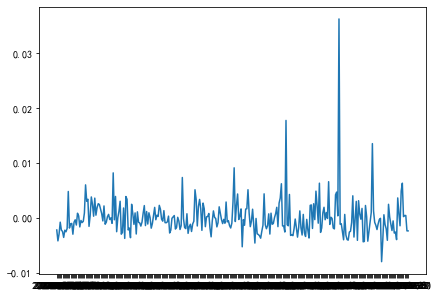

In [30]:
plt.rcParams['figure.constrained_layout.use'] = True # 自动约束布局
plt.plot(df_h['Date'], df_h['dif'])

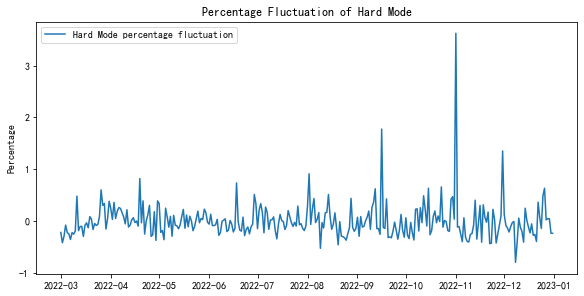

In [52]:
x = np.arange(306)
dti = pd.date_range('2022-3', periods=306, freq='D')

plt.figure(figsize=(8,4))


plt.plot(dti, 100*df_h['dif'],  label='Hard Mode percentage fluctuation')

plt.ylabel('Percentage')
plt.legend()
plt.title('Percentage Fluctuation of Hard Mode')

plt.savefig("Hard Mode percentage fluctuation.svg",dpi=1500)
plt.show()

In [ ]:
x = np.arange(306)
dti = pd.date_range('2022-3', periods=306, freq='D')

plt.figure(figsize=(8,4))


plt.plot(dti, 100*df_h['dif'],  label='Hard Mode percentage fluctuation')

plt.ylabel('Percentage')
plt.legend()
plt.title('Percentage Fluctuation of Hard Mode')

plt.savefig("Hard Mode percentage fluctuation.svg",dpi=1500)
plt.show()